**GIẢI THÍCH DỮ LIỆU:**

**1.ID:** Mã số duy nhất cho mỗi vụ án.

**2.Case Number:** Số hồ sơ của vụ án.

**3.Date:** Ngày và giờ xảy ra vụ án.

**4.Block:** Địa chỉ gần đúng nơi xảy ra vụ án.

**5.IUCR:** Mã phân loại tội phạm.

**6. OUTPUT - Primary Type:** Loại tội phạm chính (ví dụ: Homicide, Theft, Burglary).

**7.Description:** Mô tả chi tiết về tội phạm.

**8.Location Description:** Mô tả về địa điểm xảy ra vụ án.

**9.Arrest:** Chỉ ra liệu có ai bị bắt giữ hay không (True/False).

**10.Domestic:** Chỉ ra liệu vụ án có liên quan đến bạo lực gia đình hay không (True/False).

**11.Beat:** Mã số khu vực cảnh sát tuần tra nơi xảy ra vụ án.

**12.District:** Quận nơi xảy ra vụ án.

**13.Ward:** Khu vực bầu cử nơi xảy ra vụ án.

**14.Community Area:** Khu vực cộng đồng nơi xảy ra vụ án.

**15.FBI Code:** Mã phân loại của FBI cho loại tội phạm.

**16-17.X Coordinate, Y Coordinate:** Tọa độ X và Y của vụ án trong hệ tọa độ địa lý.

**18.Year:** Chứa thông tin về năm xảy ra vụ án.

**19.Updated On:** Chứa ngày và giờ mà thông tin vụ án được cập nhật lần cuối trong hệ thống.

**20-21.Latitude, Longitude:** Vĩ độ và kinh độ của vị trí vụ án.

**22.Location:** Tọa độ kết hợp của vị trí vụ án

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Kiểm định Chi-squared
from scipy.stats import chi2_contingency, spearmanr, skew, pearsonr

from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split, ParameterGrid, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, precision_recall_fscore_support, confusion_matrix
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler

#Kiểm định Chi-squared
from scipy.stats import chi2_contingency

#Random Forest
from sklearn.ensemble import RandomForestClassifier

#NLP
import nltk
from collections import Counter
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string

In [3]:
data = pd.read_csv('/content/drive/MyDrive/Datasets/Crimes-In-Chicago-(2001-to-2023)/Crimes-In-Chicago-(2001-to-2023)-4-most-types.csv')
data

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,Year,Updated On,Latitude,Longitude
0,11341943,.JB299184,06/08/2018 10:00:00 PM,060XX N SHERIDAN RD,0890,THEFT,FROM BUILDING,APARTMENT,False,False,2433,24.0,48.0,77.0,06,2018,2018-06-15 16:08:10,41.991561,-87.655432
1,3773912,04X245238,12/13/2004 09:15:00 PM,006XX N RIDGEWAY AVE,2024,NARCOTICS,POSS: HEROIN(WHITE),SIDEWALK,True,False,1122,11.0,27.0,23.0,18,2004,2018-02-28 15:56:25,41.892451,-87.719888
2,5555374,07HN36467,05/25/2007 02:51:00 PM,022XX N LA CROSSE AVE,1812,NARCOTICS,POSS: CANNABIS MORE THAN 30GMS,RESIDENCE,True,False,2522,25.0,31.0,19.0,18,2007,2018-02-28 15:56:25,41.921066,-87.747452
3,7301394,105185,01/04/2010 06:00:00 PM,012XX W 111TH PL,0810,THEFT,OVER $500,STREET,False,False,2234,22.0,34.0,75.0,06,2010,2018-02-10 15:50:01,41.691318,-87.653010
4,3750199,121135,01/12/2005 09:00:00 AM,031XX W CERMAK RD,0820,THEFT,$500 AND UNDER,STREET,False,False,1033,10.0,24.0,30.0,06,2005,2018-02-28 15:56:25,41.851786,-87.703683
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5097490,5762206,ZZ572583,09/06/2007 12:00:00 AM,031XX S ARCHER AVE,1305,CRIMINAL DAMAGE,CRIMINAL DEFACEMENT,CTA GARAGE / OTHER PROPERTY,False,False,922,9.0,11.0,59.0,14,2007,2018-02-28 15:56:25,41.837501,-87.666044
5097491,2245722,ZZ591134,07/18/2002 05:00:00 PM,005XX N MICHIGAN AVE,0890,THEFT,FROM BUILDING,HOTEL/MOTEL,False,False,1834,18.0,42.0,8.0,06,2002,2018-02-28 15:56:25,41.892017,-87.624165
5097492,5876425,ZZ696090,10/29/2007 12:01:00 AM,048XX N MC VICKER AVE,1305,CRIMINAL DAMAGE,CRIMINAL DEFACEMENT,ALLEY,False,False,1622,16.0,45.0,11.0,14,2007,2018-02-28 15:56:25,41.969090,-87.779522
5097493,3644333,ZZ740108,11/05/2004 09:00:00 AM,041XX N KEYSTONE AVE,0820,THEFT,$500 AND UNDER,STREET,False,False,1722,17.0,39.0,16.0,06,2004,2018-02-28 15:56:25,41.955988,-87.729287


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5097495 entries, 0 to 5097494
Data columns (total 15 columns):
 #   Column                Dtype  
---  ------                -----  
 0   IUCR                  object 
 1   Primary Type          object 
 2   Description           int64  
 3   Location Description  object 
 4   Arrest                bool   
 5   Domestic              bool   
 6   Beat                  int64  
 7   District              float64
 8   Ward                  float64
 9   Community Area        float64
 10  FBI Code              object 
 11  Year                  int64  
 12  Latitude              float64
 13  Longitude             float64
 14  Processing Days       int64  
dtypes: bool(2), float64(5), int64(4), object(4)
memory usage: 515.3+ MB


# **EDA**

***Chiếm tỉ trọng lớn nhất là THEFT/Trộm cắp và BATTERY/Hành hung***

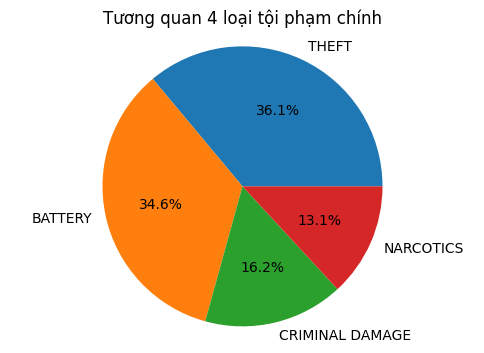

In [4]:
crime_types = data['Primary Type'].value_counts()
total_crimes = crime_types.sum() # Tính tổng số tội phạm

# Tính phần trăm cho từng loại tội phạm
crime_types_pct = crime_types / total_crimes * 100

# Tạo biểu đồ hình tròn
fig, ax = plt.subplots(figsize=(6,4))
ax.pie(crime_types.values, labels = crime_types.index, autopct='%1.1f%%')
ax.axis('equal')
ax.set_title('Tương quan 4 loại tội phạm chính')

plt.show()

***Các vụ án thường xảy ra tại các địa điểm công cộng, các khu vực vắng người qua lại, và các địa điểm riêng tư***

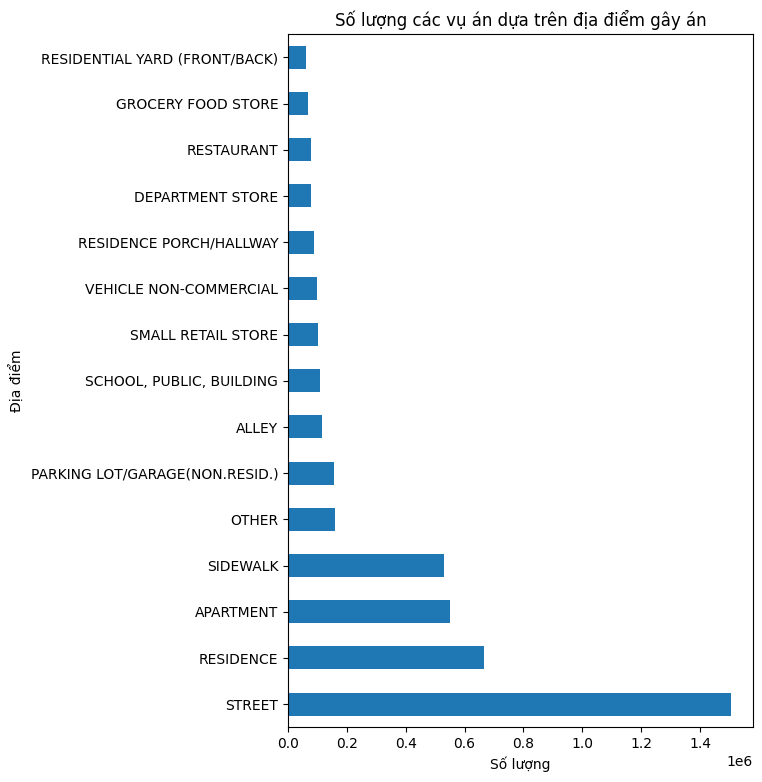

In [10]:
plt.figure(figsize=(6,9))
data['Location Description'].value_counts(ascending=False).head(15).plot(kind='barh')
plt.title('Số lượng các vụ án dựa trên địa điểm gây án')
plt.ylabel('Địa điểm')
plt.xlabel('Số lượng')
plt.show()

***Mã phân loại FBI Code cho từng loại vụ án***

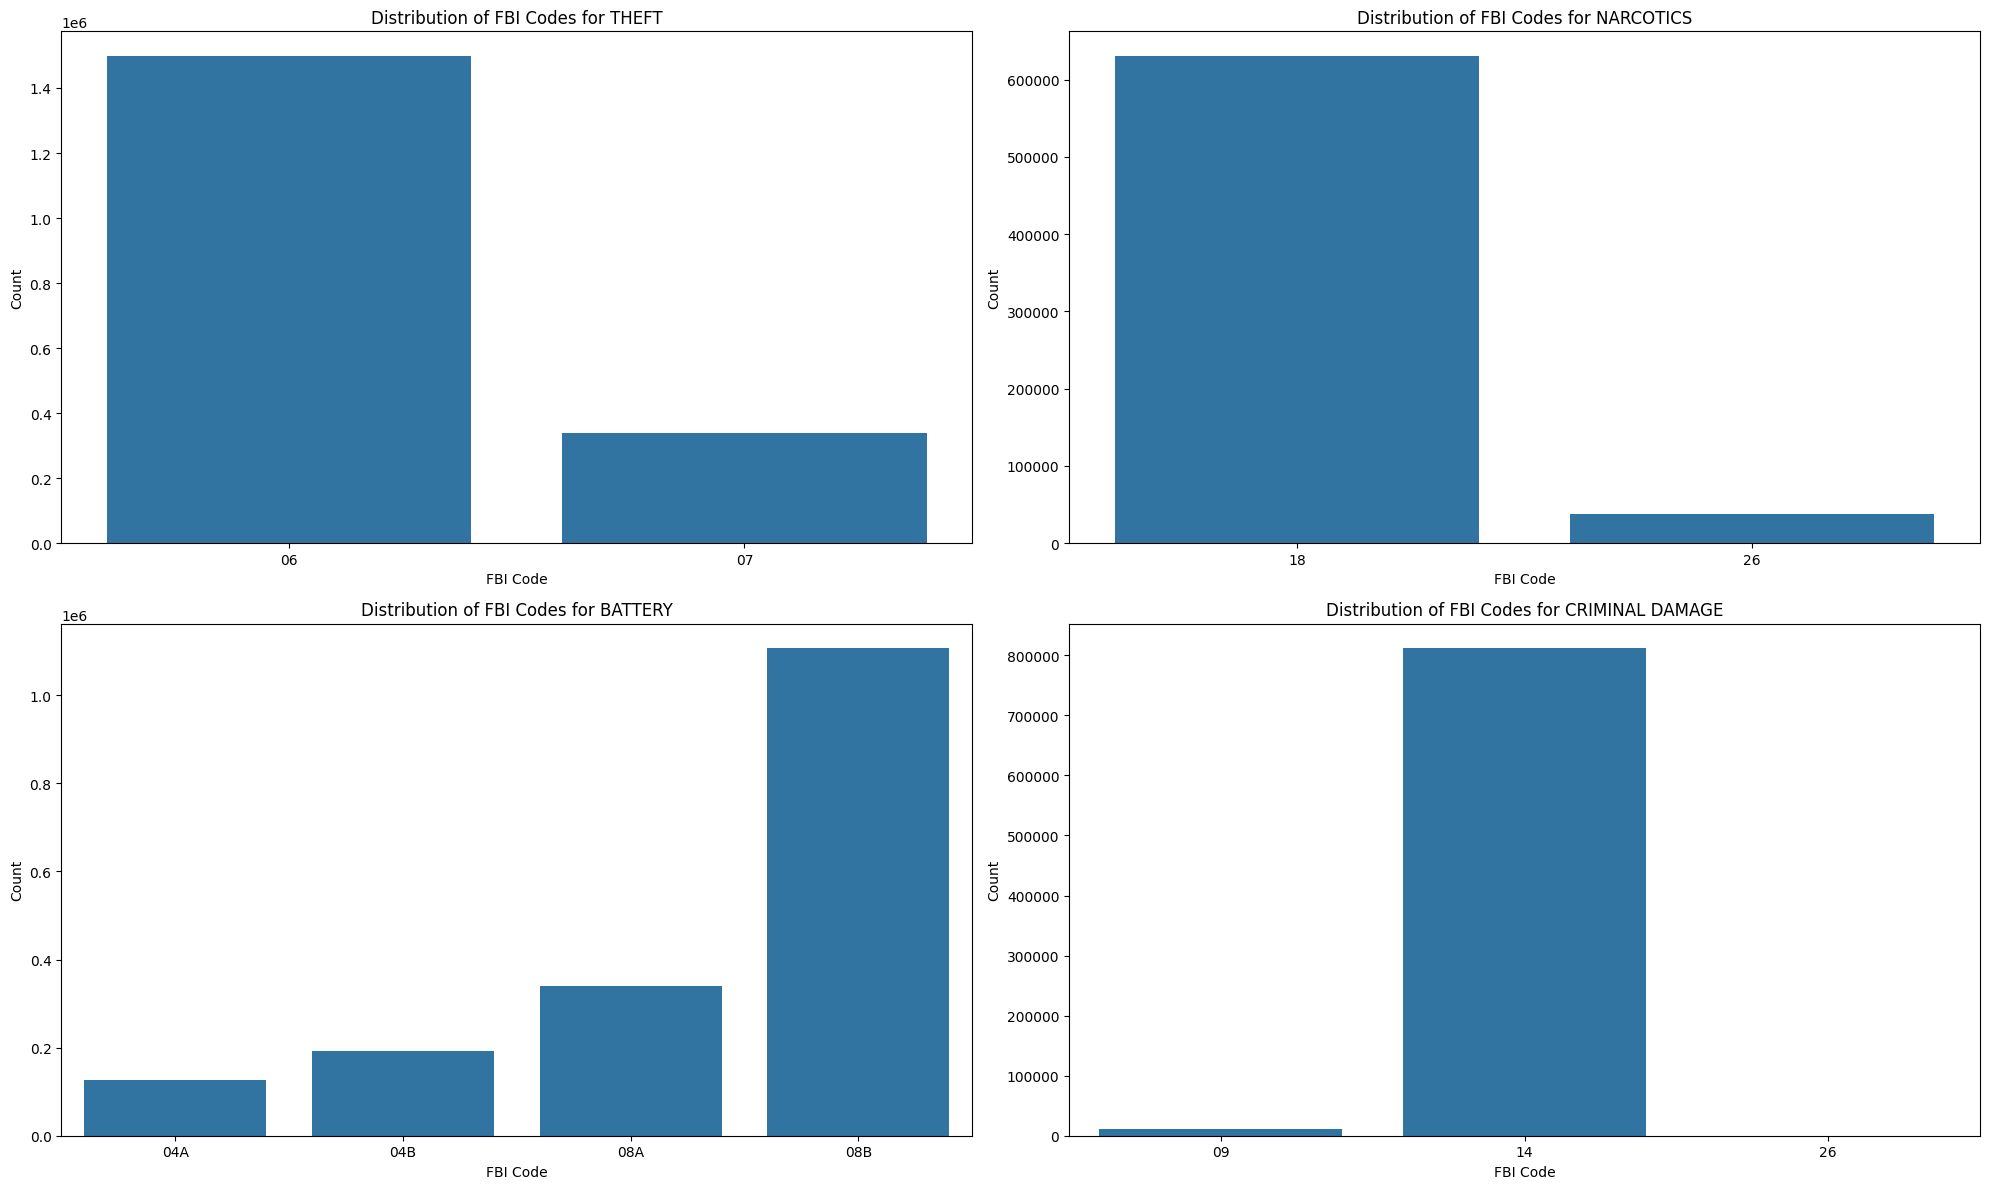

In [12]:
count_data = data.groupby(['Primary Type', 'FBI Code']).size().reset_index(name='Count')

# Tạo subplot với kích thước 2 hàng, 2 cột
fig, axs = plt.subplots(2, 2, figsize=(20, 12))

# Danh sách các loại tội phạm trong 'Primary Type'
primary_types = data['Primary Type'].unique()

# Vẽ biểu đồ Histogram cho mỗi loại tội phạm
for i, primary_type in enumerate(primary_types):
    ax = axs[i // 2, i % 2] #Vẽ 4 biểu đồ, bố trí 2x2
    subset = count_data[count_data['Primary Type'] == primary_type]
    sns.barplot(data=subset, x='FBI Code', y='Count', ax=ax)
    ax.set_title(f'Distribution of FBI Codes for {primary_type}')
    ax.set_xlabel('FBI Code')
    ax.set_ylabel('Count')

plt.tight_layout()
plt.show()

# **PREPROCESSING**

***Chuyển 2 columns Date và Updated On sang dạng datetime, sau đó tạo một columns mới tính số ngày xử lý kể từ lúc gây án:***

In [4]:
data['Date'] = pd.to_datetime(data['Date'], format='%m/%d/%Y %I:%M:%S %p')
data['Updated On'] = pd.to_datetime(data['Updated On'], format='%Y-%m-%d %H:%M:%S')

data['Processing Days'] = (data['Updated On'] - data['Date']).dt.days

In [5]:
data = data.drop(columns = ['Updated On', 'Date', 'Case Number', 'ID', 'Block'])

***Description: Column này quan trọng nhất, vì có chứa các từ ngữ liên quan mật thiết đến các tội danh. Ta sẽ phân tích kĩ ở column này***

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
data.loc[:, 'Description'] = data['Description'].str.lower().str.translate(str.maketrans('', '', string.punctuation))

# Tải danh sách stop words
stop_words = set(stopwords.words('english'))

# Hàm để lấy các từ xuất hiện nhiều nhất trong một nhóm
def most_common_words(descriptions):
    words = word_tokenize(' '.join(descriptions))
    words = [word for word in words if word not in stop_words]  # Loại bỏ stop words
    word_freq = Counter(words)
    return word_freq.most_common(5)  # Lấy 5 từ xuất hiện nhiều nhất

# Nhóm theo 'Primary Type' và tính toán từ xuất hiện nhiều nhất cho mỗi nhóm
result = data.groupby('Primary Type')['Description'].apply(most_common_words).reset_index()
result

**THEFT:**
*500, automobile, theft, building, retail*

**BATTERY:**
*simple, domestic, battery, aggravated, weapon*

**CRIMINAL DATMAGE:**
*property, vehicle, criminal, defacement, city*

**NARCOSTIC:**
*poss, cannabis, 30gms, less, crack*

***Mã hóa các giá trị thống kê trong trong column Description thành dạng số***

In [6]:
theft_keys = ["500", "automobile", "theft", "building", "retail"]
battery_keys = ["simple", "domestic", "battery", "aggravated", "weapon"]
criminal_keys = ["property", "vehicle", "criminal", "defacement", "city"]
narcotic_keys = ["poss", "cannabis", "30gms", "less", "crack"]

# Hàm để kiểm tra xem một mô tả có chứa bất kỳ từ khóa nào không
def encode_description(description):
    # Kiểm tra nếu bất kỳ từ khóa nào nằm trong chuỗi 'description'
    if any(keyword in description.lower() for keyword in theft_keys):
        return 0
    elif any(keyword in description.lower() for keyword in battery_keys):
        return 1
    elif any(keyword in description.lower() for keyword in criminal_keys):
        return 2
    elif any(keyword in description.lower() for keyword in narcotic_keys):
        return 3
    else:
        return 4

# Áp dụng mã hóa cho cột 'Description'
data['Description'] = data['Description'].apply(encode_description)

***Ta sẽ giữ lại các giá trị phổ biến nhất trong Location Description, FBI Code, IUCR, District, còn lại ta sẽ đổi thành Other***

In [7]:
location_const = data['Location Description'].value_counts().index.tolist()[:15]
data['Location Description'] = data['Location Description'].apply(lambda x: x if x in location_const else 'OTHER')

FBI_const = data['FBI Code'].value_counts().head(8).index.tolist()
data['FBI Code'] = data['FBI Code'].apply(lambda x: x if x in FBI_const else 'OTHER')

IUCR_const = data['IUCR'].value_counts().head(12).index.tolist()
data['IUCR'] = data['IUCR'].apply(lambda x: x if x in IUCR_const else 'OTHER')

District_const = data['District'].value_counts().head(15).index.tolist()
data['District'] = data['District'].apply(lambda x: x if x in District_const else 'OTHER')

***Tiến hành Label Encoding cho tất cả các giá trị trên, mã hóa theo thứ tự value_counts()***

In [8]:
label_ls = ['IUCR', 'Primary Type', 'Description', 'Location Description', 'Arrest', 'Domestic', 'Beat', 'District', 'Ward', 'Community Area', 'FBI Code']
for col in label_ls:
    freq_order = data[col].value_counts().index
    mapping = {val: idx for idx, val in enumerate(freq_order)}
    data[col] = data[col].map(mapping)

***Label Encoding cho column Year, theo thứ tự index***

In [9]:
year_mapping = {year: idx for idx, year in enumerate(sorted(data['Year'].unique()))}
data['Year'] = data['Year'].map(year_mapping)

In [12]:
data

,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,Year,Latitude,Longitude,Processing Days
0,10,0,0,3,0,0,135,0,45,36,0,17,41.991561,-87.655432,6
1,0,3,3,4,1,0,16,1,3,2,3,3,41.892451,-87.719888,4824
2,0,3,3,2,1,0,158,6,30,21,3,6,41.921066,-87.747452,3932
3,6,0,0,0,0,0,75,0,11,42,0,9,41.691318,-87.653010,2958
4,2,0,0,0,0,0,178,13,2,22,0,4,41.851786,-87.703683,4795
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5097490,0,2,2,1,0,0,154,9,27,59,2,6,41.837501,-87.666044,3828
5097491,10,0,0,1,0,0,4,12,1,1,0,1,41.892017,-87.624165,5703
5097492,0,2,2,6,0,0,142,0,43,63,2,6,41.969090,-87.779522,3775
5097493,2,0,0,0,0,0,140,0,48,32,0,3,41.955988,-87.729287,4863


# **FEATURES SELCTION**

***Kiểm định Chi-squared***

In [13]:
chi_cols = ['IUCR', 'Description', 'Location Description', 'Arrest', 'Domestic', 'Beat', 'District', 'Ward', 'Community Area', 'FBI Code', 'Year']

#Chi-square test cho các cột Object so với cột Output của data
for i in chi_cols:
    chi2, pval, _, _ = chi2_contingency(pd.crosstab(data[i], data['Primary Type']))
    print(i, '---', pval)

IUCR --- 0.0
Description --- 0.0
Location Description --- 0.0
Arrest --- 0.0
Domestic --- 0.0
Beat --- 0.0
District --- 0.0
Ward --- 0.0
Community Area --- 0.0
FBI Code --- 0.0
Year --- 0.0


***Spearman Correlation***

In [14]:
spear_cols = ['Latitude', 'Longitude', 'Processing Days', 'Primary Type']
spearman_df = data[spear_cols]
correlation_results = []

# Duyệt qua tất cả các cột trong DataFrame
for col in spearman_df.columns:
  corr, p_value = spearmanr(spearman_df[col], spearman_df['Primary Type'])
  correlation_results.append((col, corr, p_value))

# Chuyển kết quả thành DataFrame để dễ quan sát
correlation_df = pd.DataFrame(correlation_results, columns=['Feature', 'Spearman Correlation', 'p-value'])
correlation_df = correlation_df.sort_values(by='Spearman Correlation', ascending=False)
correlation_df

,Feature,Spearman Correlation,p-value
3,Primary Type,1.000000,0.0
2,Processing Days,0.078537,0.0
1,Longitude,-0.070877,0.0
0,Latitude,-0.088525,0.0


***Corr Matrix***

In [15]:
corr = data.corr()
corr.style.background_gradient(cmap='coolwarm')

,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,Year,Latitude,Longitude,Processing Days
IUCR,1.000000,-0.057764,-0.178405,0.127902,0.080343,-0.262234,0.024098,0.008080,0.017894,0.002969,-0.090485,-0.024966,0.039504,0.033102,0.024676
Primary Type,-0.057764,1.000000,0.840661,-0.067140,0.491135,-0.012139,-0.112435,-0.003339,-0.102245,-0.066597,0.397092,-0.097841,-0.066828,-0.063326,0.092789
Description,-0.178405,0.840661,1.000000,-0.052210,0.441827,-0.053792,-0.103112,-0.002810,-0.108359,-0.070433,0.372150,-0.092569,-0.054687,-0.046047,0.085862
Location Description,0.127902,-0.067140,-0.052210,1.000000,0.097384,-0.023409,-0.028403,-0.009717,-0.010752,-0.027592,-0.096871,0.025947,0.038809,0.001515,-0.039994
Arrest,0.080343,0.491135,0.441827,0.097384,1.000000,-0.056835,-0.084667,0.002825,-0.100766,-0.084118,0.199153,-0.113884,-0.003980,-0.047104,0.102674
Domestic,-0.262234,-0.012139,-0.053792,-0.023409,-0.056835,1.000000,-0.072591,-0.000615,-0.047816,-0.029897,-0.007504,0.084690,-0.096982,0.010654,-0.081694
Beat,0.024098,-0.112435,-0.103112,-0.028403,-0.084667,-0.072591,1.000000,0.062662,0.391387,0.344270,-0.085726,-0.007155,0.365813,-0.067902,0.010133
District,0.008080,-0.003339,-0.002810,-0.009717,0.002825,-0.000615,0.062662,1.000000,-0.137316,-0.116283,0.002250,-0.000298,-0.127283,0.213560,0.000345
Ward,0.017894,-0.102245,-0.108359,-0.010752,-0.100766,-0.047816,0.391387,-0.137316,1.000000,0.569945,-0.073300,-0.010891,0.352404,-0.299550,0.011557
Community Area,0.002969,-0.066597,-0.070433,-0.027592,-0.084118,-0.029897,0.344270,-0.116283,0.569945,1.000000,-0.038130,-0.005804,-0.023056,-0.016770,0.007659


In [16]:
data = data.drop(columns = ['Community Area'])

# **PREDICTION**

In [28]:
#Hàm đánh giá hiệu suất
def print_scores(y_test, y_pred):
  print(classification_report(y_test, y_pred))

#Hàm chia tập train-test và MinMax Scaler
def preprocess_data(data, test_size=0.2, random_state=42):

    # Chia tập train-test
    X = data.drop(columns=['Primary Type'], axis=1)
    features = X.columns

    y = data['Primary Type']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

    #MinMax Scaler
    scaler = MinMaxScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    return X_train, X_test, y_train, y_test

In [29]:
#Lấy mẫu ngẫu nhiên cho 4 giá trị:
df0 = data[data['Primary Type']==0].sample(n=150000, random_state=42)
df1 = data[data['Primary Type']==1].sample(n=150000, random_state=42)
df2 = data[data['Primary Type']==2].sample(n=150000, random_state=42)
df3 = data[data['Primary Type']==3].sample(n=150000, random_state=42)

In [30]:
df = pd.concat([df0, df1, df2, df3])
df = df.sample(frac=1).reset_index(drop=True)

In [31]:
X_train, X_test, y_train, y_test = preprocess_data(df)

***1.Random Forest***

In [32]:
model_RF = RandomForestClassifier(n_estimators=200, random_state=42, class_weight = 'balanced')
model_RF.fit(X_train, y_train)

y_train_pred = model_RF.predict(X_train)
y_test_pred = model_RF.predict(X_test)

print_scores(y_train, y_train_pred)
print_scores(y_test, y_test_pred)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    120043
           1       1.00      1.00      1.00    119722
           2       1.00      1.00      1.00    120138
           3       1.00      1.00      1.00    120097

    accuracy                           1.00    480000
   macro avg       1.00      1.00      1.00    480000
weighted avg       1.00      1.00      1.00    480000

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     29957
           1       1.00      1.00      1.00     30278
           2       1.00      1.00      1.00     29862
           3       1.00      1.00      1.00     29903

    accuracy                           1.00    120000
   macro avg       1.00      1.00      1.00    120000
weighted avg       1.00      1.00      1.00    120000



In [34]:
# Thực hiện Cross-Validation với 5-fold trên tập train
cv_scores = cross_val_score(model_RF, X_train, y_train, cv=5, scoring='accuracy')

# In ra kết quả của từng fold và trung bình
print("Cross-validation scores for each fold:", cv_scores)
print("Mean accuracy on training data:", cv_scores.mean())
print("Standard deviation:", cv_scores.std())

# Huấn luyện mô hình trên toàn bộ tập train và đánh giá trên tập test
model_RF.fit(X_train, y_train)
test_score = model_RF.score(X_test, y_test)

print("Test accuracy:", test_score)

Cross-validation scores for each fold: [0.99954167 0.99971875 0.99967708 0.99954167 0.99964583]
Mean accuracy on training data: 0.999625
Standard deviation: 7.186745129442546e-05
Test accuracy: 0.999625


**KẾT LUẬN:**

***Mô hình dường như không bị Overfitting vì các thông số đều ở mức tốt, có thể do dữ liệu của mô hình đơn giản. Và Random Forest đã cho hiệu suất gần như tuyệt đối, nên không cần phải dùng đến các mô hình khác***